# Demonstrating methylize regression and plotting

In [1]:
import numpy as np
import pandas as pd
import math
import time
import methylprep
import methylcheck

In [2]:
%load_ext autoreload
%autoreload 2
from diff_meth_pos import diff_meth_pos, volcano_plot, manhattan_plot

In [3]:
#Install joblib module for parallelization
import sys
!conda install --yes --prefix {sys.prefix} joblib

In [4]:
# load a processed dataset and the phenotype list per sample.
# in CLI I ran `python -m methylprep process -d GSE69852_copy --betas --m_value to make these files.
betas = pd.read_pickle('GSE69852_beta_values.pkl')
m_values = pd.read_pickle('GSE69852_m_values.pkl')
betas.head()
#m_values.head()

## Testing logistic regression

In [6]:
##Create a logistic regression dataset using strings that will later be converted to zeros and ones
test_pheno_data = ["fetal","fetal","fetal","adult","adult","adult"]

In [7]:
test_M_values_T = m_values.transpose()
test_M_values_T

IlmnID,cg00035864,cg00061679,cg00063477,cg00121626,cg00223952,cg00243321,cg00271873,cg00272582,cg00308367,cg00311963,...,cg27572240,cg27576692,cg27603882,cg27604249,cg27610821,cg27614706,cg27619353,cg27620176,cg27647370,cg27652464
9247377093_R02C01,-1.657558,-0.396044,4.145929,-0.077822,-4.422725,1.428067,0.887213,-4.277830,3.444005,-0.069623,...,-5.723271,4.989842,-5.625227,2.630148,1.878921,4.999150,-2.224928,5.723168,5.544820,-4.371885
9247377093_R03C01,-1.272171,-0.585133,4.040560,-0.819236,-4.566209,1.650368,-0.130788,-4.179360,3.519842,0.041774,...,-5.781331,5.496960,-5.629285,2.870655,1.898206,5.135388,-2.098986,5.976650,4.862443,-4.761151
9247377093_R06C02,-1.068828,-0.229694,4.415733,-1.005097,-4.630842,1.485471,-0.410473,-3.654502,3.541137,-0.293482,...,-5.740904,5.840322,-5.795193,3.462553,2.273422,4.845416,-2.198372,5.820837,5.923393,-4.222713
9247377085_R04C02,-1.134419,0.172425,4.186749,-1.002444,-5.443880,0.583537,1.346416,-4.212176,3.414862,0.007094,...,-5.810003,3.203422,-5.570827,1.337832,-2.171884,4.452098,-0.996283,5.720355,2.831669,-4.534927
9247377093_R05C01,-1.635230,0.160366,4.071644,-0.541178,-5.146184,0.754072,1.649216,-4.114014,3.273894,0.001541,...,-5.900220,3.536042,-5.749431,1.386635,-1.525328,4.256825,-1.127194,5.795570,2.736498,-4.738488
9247377093_R02C02,-2.339952,0.319934,4.262602,-1.106664,-5.433991,0.950332,1.703134,-4.199340,3.109885,-0.353469,...,-5.713091,3.795702,-5.495856,1.278621,-0.966895,4.292308,-1.357735,5.718294,2.757395,-5.130338


In [8]:
##Run a logistic regression on the methylation data, first 30000 probes only here 
test_results = diff_meth_pos(test_M_values_T.sample(30000, axis=1), #.iloc[:,64000:67000],
                                  test_pheno_data,
                                  regression_method="logistic")

All samples with the phenotype (fetal) were assigned a value of 0 and all samples with the phenotype (adult) were assigned a value of 1 for the logistic regression analysis.



1782 probes failed the logistic regression analysis due to perfect separation and could not be included in the final results.
22 probes failed the logistic regression analysis due to encountering a LinAlgError: Singular matrix and could not be included in the final results.
Probes with LinAlgError:
cg04586299
cg23842870
cg00647232
cg07554664
cg03611241
cg13737042
cg07809027
cg27089226
cg11311332
cg10780367
cg01214054
cg07791490
cg16032841
cg05654164
cg13368198
cg08572214
cg06525670
cg12057563
cg22950598
cg10404717
cg11882563
cg02845204


## Testing Manhattan plot visualizations

Total probes to plot: 26335
CH-01 2502 | CH-02 1871 | CH-03 1306 | CH-04 1203 | CH-05 1311 | CH-06 1974 | CH-07 1583 | CH-08 1100 | CH-09 530 | CH-10 1310 | CH-11 1591 | CH-12 1275 | CH-13 647 | CH-14 817 | CH-15 853 | CH-16 1199 | CH-17 1539 | CH-18 320 | CH-19 1481 | CH-20 593 | CH-21 255 | CH-22 462 | CH-X 596 | CH-Y 17
p-value line: 0.8239087409443188


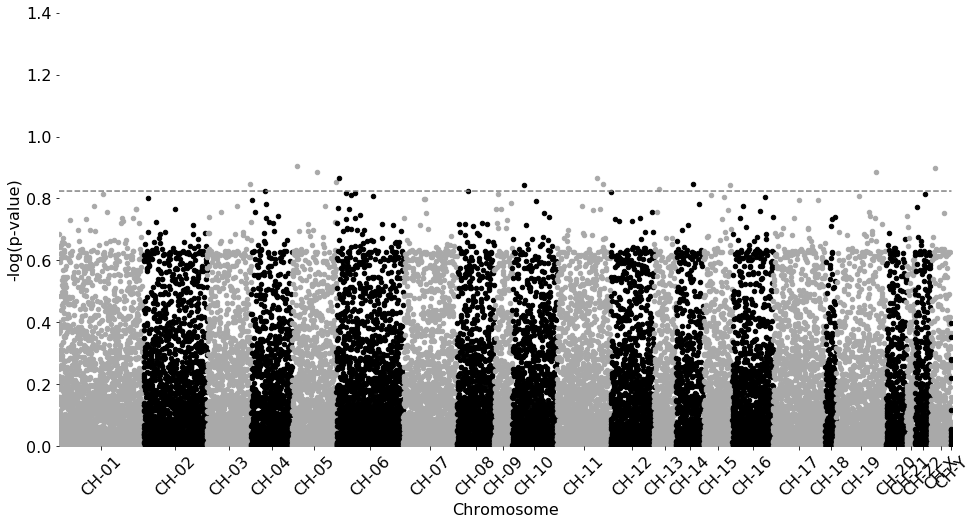

In [49]:
manhattan_plot(test_results, cutoff=0.15, palette='Gray3')

In [10]:
""" pvalues: diff bw the two phenotype labels (A vs B difference sig)
most p-values in the demo data are not near or below 0.05.
That means those probes / locations are not useful in separating the two phenotypes
"""
interesting_probes = test_results[test_results['PValue'] <= 0.13]
interesting_probes

,Coefficient,StandardError,PValue,95%CI_lower,95%CI_upper,FDR_QValue,minuslog10pvalue,chromosome
cg02067946,6.648725,4.329956,0.124657,-1.837832,15.135282,0.99999,0.904285,CH-05
cg09536390,7.600575,4.978116,0.126811,-2.156353,17.357503,0.99999,0.896842,CH-X


## Testing linear regression

In [11]:
# usually you would pull this data from methylprep meta_data dataframe
# Create a linear regression dataset using strings that will be coerced to numbers (adult ages are estimates, not exact)
test_pheno_data2 = ["0","0","0","52","54","57"]

In [12]:
# Run a linear regression on the methylation data versus age of sample
test_results2 = diff_meth_pos(test_M_values_T.iloc[:,:10000],
                              test_pheno_data2,
                              regression_method="linear")

In [45]:
interesting_probes = test_results2[test_results2['PValue'] <= 0.05]
print(len(interesting_probes))
interesting_probes.head()

2299


,Coefficient,StandardError,PValue,95%CI_lower,95%CI_upper,FDR_QValue
cg00590761,-0.094347,0.001633,2.940652e-08,-0.098545,-0.090148,0.000294
cg06650847,-0.085648,0.002095,1.649933e-07,-0.091032,-0.080263,0.000550
cg26800155,-0.031951,0.000734,1.205883e-07,-0.033837,-0.030065,0.000550
cg17670641,-0.092989,0.002417,2.236640e-07,-0.099202,-0.086775,0.000559
cg14029629,-0.106476,0.003097,3.917275e-07,-0.114437,-0.098514,0.000783


## Testing Volcano plot visualizations

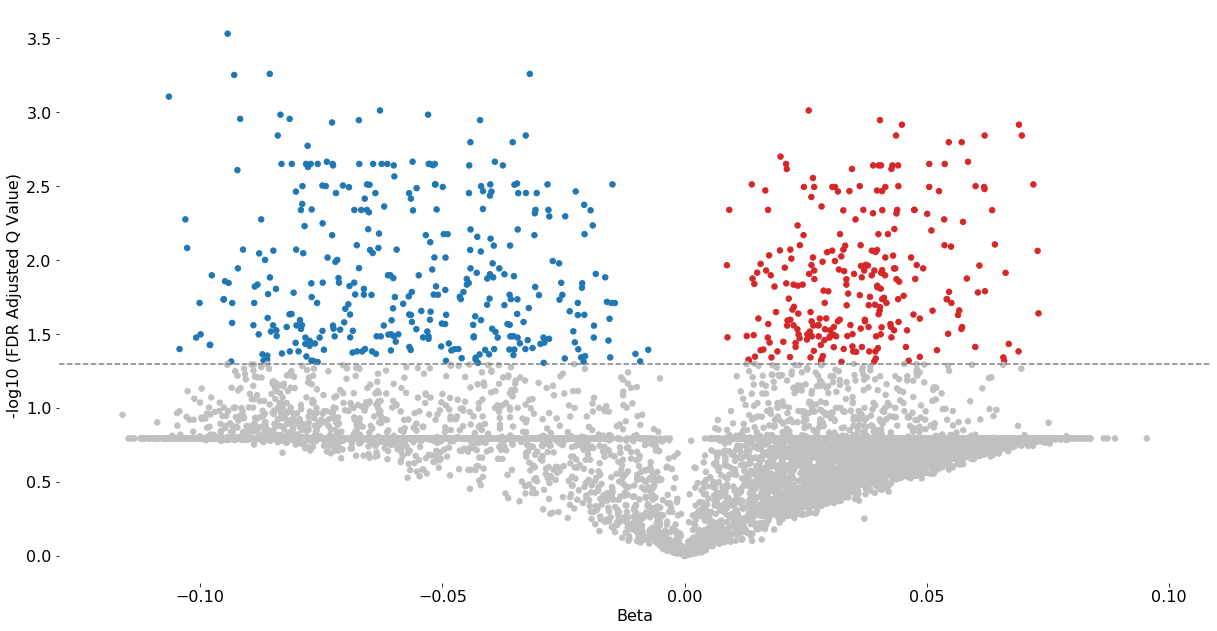

In [47]:
volcano_plot(test_results2, fontsize=16, cutoff=0.05)